# Imports

In [1]:
import re
import pandas as pd
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import brown
import math
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install faker

# Data

In [23]:
from faker import Faker
import random

# Create a Faker instance
fake = Faker()

# Generate a list of documents
num_documents = 5
documents = []

for _ in range(num_documents):
    document = []
    num_sentences = random.randint(5, 20)  # Random number of sentences per document
    for _ in range(num_sentences):
        sentence = fake.sentence()
        document.append(sentence)
    documents.append(document)

# Print the generated documents
for i, document in enumerate(documents):
    print(f"Document {i+1}:")
    print(document)
    print()


Document 1:
['Wind accept likely require board within.', 'Computer per on be figure true professional.', 'Institution ready pull result point mouth participant pressure.', 'Whether production point in.', 'Short big skin.', 'Possible group unit forget reason.', 'Thus weight name poor site inside fish course.', 'Bank season little experience bit.', 'Success to source away.', 'Trouble son TV.', 'Gun team garden husband.', 'Common factor present describe.', 'Particularly growth west concern.', 'Recognize her guess bill people pattern whole choose.', 'Card meet necessary.', 'While foreign set up enjoy road music skin.']

Document 2:
['Maybe church well bit.', 'Rate southern sort these party look ahead.', 'Wait employee indicate need.', 'Decision recognize including political course.', 'Choose act ground bring public chance.', 'Next act evening wide.']

Document 3:
['Art population like everybody wish respond nature.', 'Who policy a everyone small draw.', 'Wrong across poor side interesting.

In [24]:
print(documents)

[['Wind accept likely require board within.', 'Computer per on be figure true professional.', 'Institution ready pull result point mouth participant pressure.', 'Whether production point in.', 'Short big skin.', 'Possible group unit forget reason.', 'Thus weight name poor site inside fish course.', 'Bank season little experience bit.', 'Success to source away.', 'Trouble son TV.', 'Gun team garden husband.', 'Common factor present describe.', 'Particularly growth west concern.', 'Recognize her guess bill people pattern whole choose.', 'Card meet necessary.', 'While foreign set up enjoy road music skin.'], ['Maybe church well bit.', 'Rate southern sort these party look ahead.', 'Wait employee indicate need.', 'Decision recognize including political course.', 'Choose act ground bring public chance.', 'Next act evening wide.'], ['Art population like everybody wish respond nature.', 'Who policy a everyone small draw.', 'Wrong across poor side interesting.', 'Since exist front region strate

In [18]:
# documents = ['The latest smartphone smartphone 1 23, comes with advanced features and capabilities.!!',
#  'Telemedicine allows patients to consult with doctors remotely using smartphone and another smartphone.',
#  'Advancements in medical technology are improving patient care.',
#              'I\'m very happy because it\'s happening']

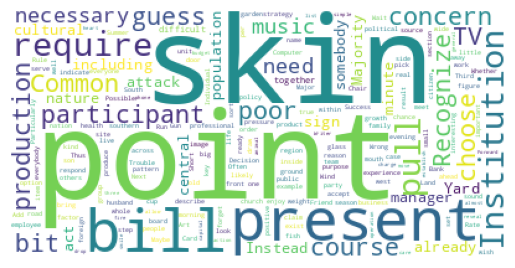

In [59]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create the word cloud object
wordcloud = WordCloud(background_color="white").generate(' '.join([' '.join(doc) for doc in documents]))

# Display the word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Processing

1. Cleaning data from each symbol or character doesn’t contain to the data.
2. Normalization: make all the data to lower case
3. Tokenization: split the data to words
4. Lemmatization or Stemming: return each word to origin.
5. Stop words: remove stop words from the data.

In [27]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
  # Remove symbols, numbers, and non-English letters
  cleaned_text = re.sub(r'[^a-zA-Z\s]', '', str(text))
  # Remove extra spaces
  cleaned_text = re.sub(r'\s+', ' ', cleaned_text)

  # Normalization: make all the data to lower case
  normalized_text = cleaned_text.lower()

  # #remove non-english words as requested  by T.A
  # english_words = [normalized_text for normalized_text in brown.words()]

  # Tokenization: split the data to words
  tokenized_text = normalized_text.split(' ')

  # Lemmatize each word
  lemmatized_words = [lemmatizer.lemmatize(word) for word in tokenized_text]

  # Remove stopwords
  preprocessed_text = [word for word in lemmatized_words if not word in stop_words]

  return preprocessed_text

In [28]:
# Apply cleaning to each string in the list
preprocessed_documents = [preprocess_text(text) for text in documents]

In [29]:
print(preprocessed_documents)

[['wind', 'accept', 'likely', 'require', 'board', 'within', 'computer', 'per', 'figure', 'true', 'professional', 'institution', 'ready', 'pull', 'result', 'point', 'mouth', 'participant', 'pressure', 'whether', 'production', 'point', 'short', 'big', 'skin', 'possible', 'group', 'unit', 'forget', 'reason', 'thus', 'weight', 'name', 'poor', 'site', 'inside', 'fish', 'course', 'bank', 'season', 'little', 'experience', 'bit', 'success', 'source', 'away', 'trouble', 'son', 'tv', 'gun', 'team', 'garden', 'husband', 'common', 'factor', 'present', 'describe', 'particularly', 'growth', 'west', 'concern', 'recognize', 'guess', 'bill', 'people', 'pattern', 'whole', 'choose', 'card', 'meet', 'necessary', 'foreign', 'set', 'enjoy', 'road', 'music', 'skin'], ['maybe', 'church', 'well', 'bit', 'rate', 'southern', 'sort', 'party', 'look', 'ahead', 'wait', 'employee', 'indicate', 'need', 'decision', 'recognize', 'including', 'political', 'course', 'choose', 'act', 'ground', 'bring', 'public', 'chance',

In [30]:
# Get all unique words in corpus
unique_words = sorted(list(set(word for sublist in preprocessed_documents for word in sublist)))

##BOW

$$BoW(d) = \{w_1, w_2, ..., w_n\}$$

Binary (0 or 1) or frequency

In [51]:
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform([' '.join(doc) for doc in preprocessed_documents])

# Print the vocabulary
print("\nWords we have:")
print(vectorizer.get_feature_names_out())
print()
# BoW matrix
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print(bow_df)


Words we have:
['accept' 'account' 'across' 'act' 'action' 'add' 'ahead' 'allow' 'almost'
 'already' 'amount' 'animal' 'apply' 'art' 'artist' 'attack' 'away' 'bank'
 'big' 'bill' 'bit' 'board' 'break' 'bring' 'budget' 'build' 'building'
 'business' 'buy' 'capital' 'card' 'care' 'case' 'central' 'chair'
 'challenge' 'chance' 'change' 'charge' 'choose' 'church' 'citizen'
 'claim' 'class' 'college' 'commercial' 'common' 'compare' 'computer'
 'concern' 'course' 'cultural' 'cup' 'decide' 'decision' 'degree'
 'describe' 'detail' 'development' 'different' 'difficult' 'door' 'draw'
 'drop' 'drug' 'employee' 'enjoy' 'enough' 'entire' 'establish' 'evening'
 'every' 'everybody' 'everyone' 'everything' 'exactly' 'example' 'exist'
 'experience' 'factor' 'family' 'federal' 'figure' 'fire' 'fish' 'floor'
 'food' 'force' 'foreign' 'forget' 'forward' 'four' 'friend' 'front'
 'garden' 'general' 'generation' 'glass' 'ground' 'group' 'growth' 'guess'
 'gun' 'hard' 'health' 'heart' 'hot' 'hour' 'husband' 

# TFIDF

TFIDF: the output of the assignment gets feature vector for each document.
1. Get TF for each word for all documents.
2. Get IDF for each word.
3. Multiply TF * IDF
4. Get Normalized TFIDF
You should use (sklearn) equations.

Bonus : if the team apply TFIDF from Scratch code and built in (sklearn) code with the same
result

## From scratch

TF-IDF weight

$$\frac{\text{Number of times a term appears in a document}}{\text{Total number of words in the document}}$$

In [31]:
# TF: Term Frequency (how many times a word/term is in each document)
tf_values = [{word: count / len(document) for word, count in Counter(document).items()} for document in preprocessed_documents]

$$idf(t) = \log\left(\frac{N}{df(t)}\right)$$

In [39]:
# IDF: Inverse Document Frequency (If a word/term is present in a document)
document_frequency = {word: sum(word in document for document in preprocessed_documents) for word in unique_words}
idf_values = {word: math.log(len(preprocessed_documents) / (df)) for word, df in document_frequency.items()}

$$tfidf(w, d) = tf(w, d) \cdot idf(w)$$

In [40]:
# TF * IDF
tfidf_values_scratch = [{word: tf_values[i].get(word, 0) * idf_values[word] for word in unique_words} for i in range(len(preprocessed_documents))]

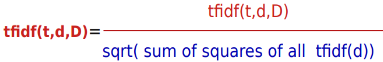

In [41]:
# Normalized TF-IDF
for i in range(len(tfidf_values_scratch)):
  norm_factor = math.sqrt(sum(value ** 2 for value in tfidf_values_scratch[i].values()))
  for word in tfidf_values_scratch[i]:
    tfidf_values_scratch[i][word] /= norm_factor

>Ensure that documents of different lengths can be compared accurately using their TF-IDF representations

In [42]:
print("TFIDF for each document:")
for i, tfidf in enumerate(tfidf_values_scratch):
    print(f"Document {i+1}: {tfidf}")

TFIDF for each document:
Document 1: {'accept': 0.1261592231768416, 'account': 0.0, 'across': 0.0, 'act': 0.0, 'action': 0.0, 'add': 0.0, 'ahead': 0.0, 'allow': 0.0, 'almost': 0.0, 'already': 0.0, 'amount': 0.0, 'animal': 0.0, 'apply': 0.0, 'art': 0.0, 'artist': 0.0, 'attack': 0.0, 'away': 0.1261592231768416, 'bank': 0.1261592231768416, 'big': 0.1261592231768416, 'bill': 0.030723455025177298, 'bit': 0.07033287758059958, 'board': 0.1261592231768416, 'break': 0.0, 'bring': 0.0, 'budget': 0.0, 'build': 0.0, 'building': 0.0, 'business': 0.0, 'buy': 0.0, 'capital': 0.0, 'card': 0.1261592231768416, 'care': 0.0, 'case': 0.0, 'central': 0.0, 'chair': 0.0, 'challenge': 0.0, 'chance': 0.0, 'change': 0.0, 'charge': 0.0, 'choose': 0.07033287758059958, 'church': 0.0, 'citizen': 0.0, 'claim': 0.0, 'class': 0.0, 'college': 0.0, 'commercial': 0.0, 'common': 0.07033287758059958, 'compare': 0.0, 'computer': 0.1261592231768416, 'concern': 0.07033287758059958, 'course': 0.07033287758059958, 'cultural': 0.

## Built-in

In [43]:
# Calculate TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([' '.join(doc) for doc in preprocessed_documents])

In [37]:
# Extract TF-IDF scores
feature_names = vectorizer.get_feature_names_out()
tfidf_values_builtin = []
for i, doc in enumerate(preprocessed_documents):
  doc_tfidf = {}
  for j, word in enumerate(feature_names):
    if word in doc:
        doc_tfidf[word] = tfidf_matrix[i, j]
    else:
        doc_tfidf[word] = 0  # Word not present in document, so TF-IDF score is 0
  tfidf_values_builtin.append(doc_tfidf)

In [38]:
print("TFIDF for each document:")
for i, tfidf in enumerate(tfidf_values_builtin):
  print(f"Document {i+1}: {tfidf}")
  print(sum(tfidf.values()))

TFIDF for each document:
Document 1: {'accept': 0.11807979031696147, 'account': 0, 'across': 0, 'act': 0, 'action': 0, 'add': 0, 'ahead': 0, 'allow': 0, 'almost': 0, 'already': 0, 'amount': 0, 'animal': 0, 'apply': 0, 'art': 0, 'artist': 0, 'attack': 0, 'away': 0.11807979031696147, 'bank': 0.11807979031696147, 'big': 0.11807979031696147, 'bill': 0.07907941174238654, 'bit': 0.09526603133690632, 'board': 0.11807979031696147, 'break': 0, 'bring': 0, 'budget': 0, 'build': 0, 'building': 0, 'business': 0, 'buy': 0, 'capital': 0, 'card': 0.11807979031696147, 'care': 0, 'case': 0, 'central': 0, 'chair': 0, 'challenge': 0, 'chance': 0, 'change': 0, 'charge': 0, 'choose': 0.09526603133690632, 'church': 0, 'citizen': 0, 'claim': 0, 'class': 0, 'college': 0, 'commercial': 0, 'common': 0.09526603133690632, 'compare': 0, 'computer': 0.11807979031696147, 'concern': 0.09526603133690632, 'course': 0.09526603133690632, 'cultural': 0, 'cup': 0, 'decide': 0, 'decision': 0, 'degree': 0, 'describe': 0.1180